In [34]:
# Imports

import numpy as np
import scipy
import matplotlib.pyplot as plt
# %matplotlib tk
%matplotlib inline

In [35]:
# Load audio file

# file_name : str = "audio/Hello Grandad.wav"
# file_name : str = "audio/College Song.wav"
file_name : str = "audio/Piano C2.wav"

sampling_freq, sound = scipy.io.wavfile.read(file_name)

sound : float = sound / (2.**15)

sound_type = sound.dtype
sound_shape = sound.shape
sound_length : int = sound.shape[0]

if len(sound.shape) == 2:
    sound = sound[:, 0] # Get single channel audio

sound_duration : float = sound.shape[0] / sampling_freq

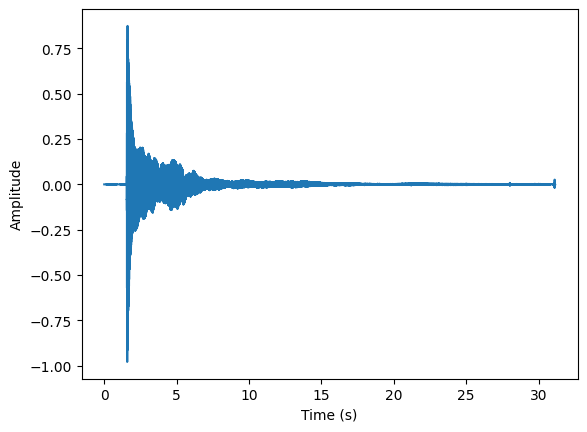

In [36]:
# Plot amplitude over time

time_points : np.ndarray = np.arange(0, sound_length, 1) / sampling_freq

#Plot the tone
plt.plot(time_points, sound)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


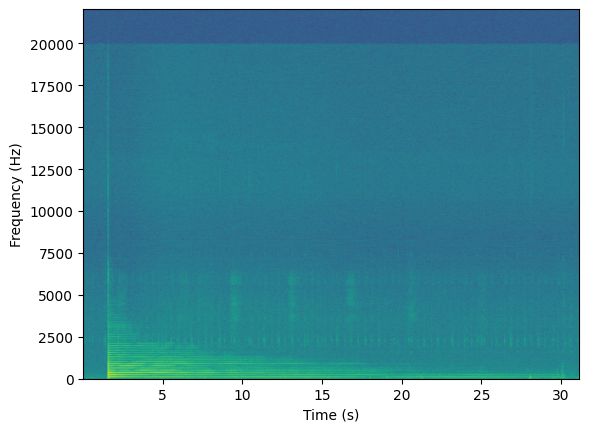

In [37]:
# Plot frequency

NFFT : int = 2**12 # Number of samples per FFT block

Pxx, freqs, bins, im = plt.specgram(sound, NFFT=NFFT, Fs=sampling_freq)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.show()

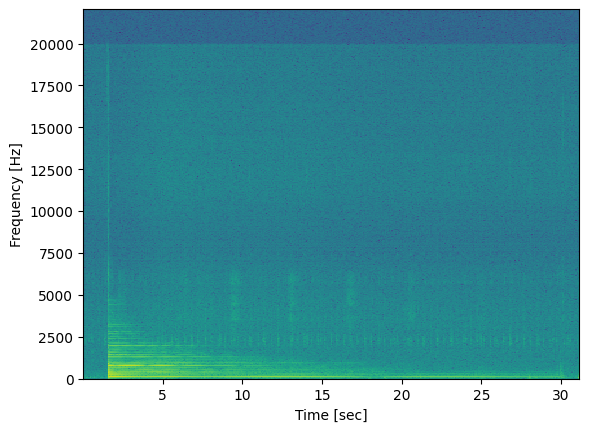

In [38]:
# Spectrogram using scipy

f, t, Sxx = scipy.signal.spectrogram(sound, nfft=NFFT, nperseg=NFFT, fs=sampling_freq)

plt.figure()
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()